Reading data 

In [ ]:
#reading data
import glob
import os
import pandas as pd
channel_path = 'C:/Users/zaure/Documents/3semester/Telegram/minsk_datasets'
read_files = glob.glob(os.path.join (channel_path,'*.csv'))
read_files
data = []
for files in read_files:
    channel_data = pd.read_csv(files, index_col = 0)
    data.append(channel_data)
data = pd.concat(data)
data['message_date'] = pd.to_datetime(data['message_date'], format='%Y-%m-%d %H:%M:%S')
data['message_date'] = data['message_date'].dt.date
minsk_local_df = data

data

In [54]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv('data.csv', index_col = 0)
data['message_date'] = pd.to_datetime(data['message_date'], format='%Y-%m-%d %H:%M:%S')
data['week_number']= data['message_date'].dt.week
data['month_number']= data['message_date'].dt.month
data['year'] = pd.DatetimeIndex(data['message_date']).year
data['chat_id'] = data['chat_id'].astype(str) 
data.loc[data[(data['month_number']) == 1 & (data['week_number'] > 49)].index, 'week_number'] = 1
data['period']= data['week_number'].astype(str) + '-' + data['year'].astype(str) 
data = data[data.message_date<='2022-02-23']
data.head()

,chat_title,chat_id,message_id,message_from_id,message_text,message_out,message_post,message_date,message_replies,message_media,message_views,month,week_number,month_number,year,period
1,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4748,1222496831,⚡️Приветствую вас в нашем чате!\nПожалуйста оз...,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",NaN,NaN,2020-11,48,11,2020,48-2020
2,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4757,489380546,NaN,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",MessageMediaPhoto(photo=Photo(id=5328035458040...,NaN,2020-11,48,11,2020,48-2020
3,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4768,1036355565,Добрый день. Я работаю в страховой компании Бе...,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",NaN,NaN,2020-11,48,11,2020,48-2020
4,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4782,771637505,NaN,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",MessageMediaPhoto(photo=Photo(id=5327758638808...,NaN,2020-11,48,11,2020,48-2020
5,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4786,771637505,NaN,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",MessageMediaPhoto(photo=Photo(id=5327758638808...,NaN,2020-11,48,11,2020,48-2020


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2501915 entries, 1 to 2724212
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   chat_title    object        
 1   message_date  datetime64[ns]
 2   month         period[M]     
dtypes: datetime64[ns](1), object(1), period[M](1)
memory usage: 76.4+ MB


In [55]:
minsk_local_df = data
#data = minsk_local_df[['chat_title',  'message_date']]
#data.head()

In [36]:
#df['day_of_week'] = df['message_date'].dt.day_name()
#df['message_date'] = pd.to_datetime(df['message_date'], format='%Y-%m-%d %H:%M:%S')
df['message_date'] = pd.to_datetime(df['message_date'], format='%Y-%m')
#df['week_number'] = df['message_date'].dt.isocalendar().week
#df['month_number']= df['message_date'].dt.month
#df_by_month= df.groupby(['month_number']).size().reset_index(name='Counts')
#df_by_week= df.groupby(['week_number']).size().reset_index(name='Counts')


Exclude small chats

In [56]:
df = minsk_local_df[['chat_id',  'message_date']]

In [57]:
#counting number of messages by months
df['month'] = df.message_date.dt.to_period("M") 
df
by_month = df.groupby(['month','chat_id']).size().reset_index(name='Counts')
by_month

,month,chat_id,Counts
0,2020-05,1102482896,53
1,2020-05,1118030129,3809
2,2020-05,1120927488,408
3,2020-05,1168214094,311
4,2020-05,1183469352,179
...,...,...,...
1983,2022-02,1489438012,38
1984,2022-02,1491875607,154
1985,2022-02,1494852723,1
1986,2022-02,1497848971,130


In [58]:
#creating DF from the period of the protests from august 2020 to may 2021
by_protests_month = by_month[(by_month['month']>='2020-08') & (by_month['month']<='2021-05')]
by_protests_month

,month,chat_id,Counts
48,2020-08,1102482896,5058
49,2020-08,1118030129,25824
50,2020-08,1120927488,706
51,2020-08,1156129149,11
52,2020-08,1167246767,13
...,...,...,...
1092,2021-05,1491875607,394
1093,2021-05,1492404838,2
1094,2021-05,1493348484,64
1095,2021-05,1496251011,1


In [108]:
annotations = list(annotations)

In [113]:
mylist = list(set(annotations))
mylist

['Октябрьский 97%',
 'Военный городок Уручье',
 'Уручье-6',
 'Менск: война пришла вместе с оккупантами - ПОРА! ПОРА!',
 'Советский рн Минск СДЖ',
 'Брилевичи 97%',
 'Домбровка-5 — чат квартала',
 'Коласа-Восточная-Белинского-Мележа',
 'Гуляем по бульвару!',
 'Заводской 97%',
 'Партизанский 97%',
 'Ангарская 97%',
 'Розочка 97',
 'Восточка Минск',
 'Грушвилль Грушевка чат',
 'Berezovka97brest']

In [ ]:
!pip install plotnine --user

# activity

In [ ]:
import glob
import os
import pandas as pd
channel_path = 'C:/Users/zaure/Documents/3semester/Telegram/minsk_datasets'
read_files = glob.glob(os.path.join (channel_path,'*.csv'))
read_files
df = []
for files in read_files:
    channel_data = pd.read_csv(files, index_col = 0)
    df.append(channel_data)
df = pd.concat(df)
df['message_date'] = pd.to_datetime(df['message_date'], format='%Y-%m-%d %H:%M:%S')
df['message_date'] = df['message_date'].dt.date
minsk_all_df = df
#minsk_df = df
df_sample = df
df

## Timespan

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:

df_by_month = df.groupby(['month','chat_id']).size().reset_index(name='Counts')
df_by_month

,month,chat_id,Counts
0,2020-05,1102482896,53
1,2020-05,1118030129,3809
2,2020-05,1120927488,408
3,2020-05,1168214094,311
4,2020-05,1183469352,179
...,...,...,...
1983,2022-02,1489438012,38
1984,2022-02,1491875607,154
1985,2022-02,1494852723,1
1986,2022-02,1497848971,130


In [61]:
df_total_count = df.groupby(['chat_id']).size().reset_index(name='Counts')
df_total_count

,chat_id,Counts
0,1102482896,41519
1,1113767475,1722
2,1118030129,282182
3,1120927488,10775
4,1143707420,11322
...,...,...
153,1494528896,36563
154,1494852723,11
155,1496251011,2310
156,1497848971,3906


In [62]:
df_total_count.describe()

,Counts
count,158.000000
mean,15834.905063
std,33025.311834
min,1.000000
25%,493.250000
50%,3491.500000
75%,16639.250000
max,282182.000000


In [205]:
perc25_chats = df_total_count[df_total_count['Counts']<1011]
perc25_chats_lst=list(perc25_chats ['chat_id'])
len(perc25_chats_lst)

114

In [200]:
perc50_chats = df_total_count[(df_total_count['Counts']>=1011 )& (df_total_count['Counts']>=10715)]
perc50_chats_lst=list(perc50_chats['chat_id'])
len(perc50_chats_lst)

57

In [201]:
perc75_chats = df_total_count[df_total_count['Counts']>=10715]
perc75_chats_lst=list(perc75_chats['chat_id'])
len(perc75_chats_lst)

57

In [206]:
df_perc25_chats = df[df['chat_id'].isin(perc25_chats_lst)]
df_perc50_chats = df[df['chat_id'].isin(perc50_chats_lst)]
df_perc75_chats = df[df['chat_id'].isin(perc75_chats_lst)]


# By month

In [5]:
import plotly.express as px

In [37]:
minsk_local_df['month']=minsk_local_df.message_date.dt.to_period("M")  

In [38]:
by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   month       1988 non-null   period[M]
 1   chat_title  1988 non-null   object   
 2   Counts      1988 non-null   int64    
dtypes: int64(1), object(1), period[M](1)
memory usage: 46.7+ KB


In [63]:
by_month.month=by_month.month.dt.strftime('%Y-%m')
by_month['month'] = pd.to_datetime(by_month['month'], format='%Y-%m')
fig = px.box(by_month, x="month", y="Counts")
fig.show()

In [45]:
by_period = minsk_local_df.groupby(['month']).size().reset_index(name='Counts')
by_period

,month,Counts
0,2020-05,11382
1,2020-06,30455
2,2020-07,47782
3,2020-08,354981
4,2020-09,556610
5,2020-10,339311
6,2020-11,260143
7,2020-12,181188
8,2021-01,143121
9,2021-02,88955


In [68]:
before_protests = by_period[by_period['month'] <= ('2020-07')]
before_protests 
#before_protests.median()

,month,Counts
0,2020-05,11382
1,2020-06,30455
2,2020-07,47782


In [69]:
after_protests = by_period[(by_period['month'] >= ('2021-04')) & (by_period['month'] <= ('2022-01'))]
after_protests 
after_protests.describe()

,Counts
count,10.000000
mean,39030.500000
std,6047.142856
min,33054.000000
25%,33594.000000
50%,38020.000000
75%,42374.250000
max,48971.000000


In [292]:
by_period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   24 non-null     object
 1   Counts  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [295]:
by_period['month'] = pd.to_datetime(by_period['month'], format='%Y-%m')

In [323]:
protest_days = pd.to_datetime('2020-08-09', format='%Y-%m') 
protest_days

Timestamp('2020-08-09 00:00:00')

In [71]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#local_chats_aug_sep_dates.plot(legend=False, color='#4169E1', linewidth=2.0)

"""for i, d in enumerate(specific_days):
    plt.vlines(d, 0, local_chats_jul_sep_dates.max(), colors='r', linestyles='dashdot', linewidth=2.0)
    plt.text(d, local_chats_jul_sep_dates.max() // 2, f'{str(d.day).zfill(2)}.{str(d.month).zfill(2)}', fontsize=24, rotation=-90
            )"""

x = mdates.datestr2num(by_period.month.dt.strftime('%Y-%m'))
by_period.month = by_period.month.dt.strftime('%Y-%m')    
plt.xlabel('Date', fontsize=20)

plt.ylabel('Number of posts', fontsize=20)
dtFmt = mdates.DateFormatter('%Y %m') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt)
ax.xaxis_date() 

protest_start = mdates.datestr2num(protest_days.strftime('%Y-%m'))
ax.axvline(protest_start , color='r', zorder=0)

ax.xaxis.set_major_locator(mdates.AutoDateLocator()) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
rcParams['figure.figsize'] = 15, 20



for tick in plt.gca().get_xticklabels():  
    
    tick.set_rotation(90)

#plt.savefig('Number-of-posts-per-day-local-chats.pdf')


pl= plt.bar(x = x, height = by_period.Counts)
for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.07, bar.get_height()+10), 
                     fontsize=10)
plt.show()

NameError: name 'ax' is not defined

ValueError: DateFormatter found a value of x=0, which is an illegal date; this usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

<Figure size 432x288 with 1 Axes>

# Chat effective dates

In [72]:
minsk_local_df


,chat_title,chat_id,message_id,message_from_id,message_text,message_out,message_post,message_date,message_replies,message_media,message_views,month,week_number,month_number,year,period
1,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4748,1222496831,⚡️Приветствую вас в нашем чате!\nПожалуйста оз...,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",NaN,NaN,2020-11,48,11,2020,48-2020
2,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4757,489380546,NaN,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",MessageMediaPhoto(photo=Photo(id=5328035458040...,NaN,2020-11,48,11,2020,48-2020
3,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4768,1036355565,Добрый день. Я работаю в страховой компании Бе...,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",NaN,NaN,2020-11,48,11,2020,48-2020
4,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4782,771637505,NaN,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",MessageMediaPhoto(photo=Photo(id=5327758638808...,NaN,2020-11,48,11,2020,48-2020
5,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4786,771637505,NaN,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",MessageMediaPhoto(photo=Photo(id=5327758638808...,NaN,2020-11,48,11,2020,48-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724201,Звязда 3(чат),1473456758,302,474618681,https://vm.tiktok.com/ZMRFYyab7/,False,False,2021-08-20,"MessageReplies(replies=0, replies_pts=470, com...",MessageMediaWebPage(webpage=WebPage(id=8817196...,NaN,2021-08,33,8,2021,33-2021
2724203,Звязда 3(чат),1473456758,304,267158101,Открыт набор в группы для детей 5+ и взрослых ...,False,False,2021-09-04,"MessageReplies(replies=0, replies_pts=470, com...",MessageMediaPhoto(photo=Photo(id=5233498795449...,NaN,2021-09,35,9,2021,35-2021
2724205,Звязда 3(чат),1473456758,306,253065191,NaN,False,False,2021-09-06,"MessageReplies(replies=0, replies_pts=470, com...",MessageMediaPhoto(photo=Photo(id=5309825827497...,NaN,2021-09,36,9,2021,36-2021
2724206,Звязда 3(чат),1473456758,307,253065191,Репетитор по математике (московский район)📚\nД...,False,False,2021-09-06,"MessageReplies(replies=0, replies_pts=470, com...",NaN,NaN,2021-09,36,9,2021,36-2021


In [73]:
import numpy as np
dff= data[['chat_id',  'message_date']]
chats_minsk =dff.groupby(['chat_id'])
  
# using agg() function on Date column
chats_effective_dates = chats_minsk.agg(Minimum_Date=('message_date', np.min), Maximum_Date=('message_date', np.max))
chats_effective_dates .reset_index(inplace = True)  
chats_effective_dates 

,chat_id,Minimum_Date,Maximum_Date
0,1102482896,2020-05-07,2022-02-23
1,1113767475,2020-09-06,2022-02-18
2,1118030129,2020-05-01,2022-02-23
3,1120927488,2020-05-01,2022-02-23
4,1143707420,2020-09-04,2022-02-22
...,...,...,...
153,1494528896,2020-08-12,2021-02-26
154,1494852723,2021-07-16,2022-02-22
155,1496251011,2020-09-04,2021-05-26
156,1497848971,2020-09-06,2022-02-23


In [74]:
chats_before_protests = chats_effective_dates [chats_effective_dates['Minimum_Date']<'2020-08-01']
chats_before_protests.reset_index(inplace = True)  
print(f'Number of chats that appeared before the protests: {chats_before_protests.chat_id.count()}')

Number of chats that appeared before the protests: 20


In [75]:
chats_before_protests = chats_effective_dates [chats_effective_dates['Minimum_Date']<='2020-08-09']
chats_before_protests.reset_index(inplace = True)  
print(f'Number of chats that appeared before the protests: {chats_before_protests.chat_id.count()}')

Number of chats that appeared before the protests: 20


In [76]:
chats_during_protests = chats_effective_dates [(chats_effective_dates['Minimum_Date']>='2020-08-10')
                                              & (chats_effective_dates['Minimum_Date']<='2021-03-25') ]
chats_during_protests.reset_index(inplace = True)  
print(f'Number of chats that appeared during the protests: {chats_during_protests.chat_id.count()}')

Number of chats that appeared during the protests: 121


In [77]:
chats_after_protests = chats_effective_dates [(chats_effective_dates['Minimum_Date']>'2021-03-25')
                                              & (chats_effective_dates['Minimum_Date']<='2022-02-27') ]
chats_after_protests.reset_index(inplace = True)  
print(f'Number of chats that appeared after the protests: {chats_after_protests.chat_id.count()}')

Number of chats that appeared after the protests: 17


In [78]:
len(chats_effective_dates.chat_id.drop_duplicates())

158

## Statistics of appeared chats

In [85]:
#chats_during_protests.drop(columns= {'index'}, inplace = True)
chats_during_protests['start_month'] = chats_during_protests.Minimum_Date.dt.to_period("M") 

In [87]:
#chats_during_protests.drop(columns= {'index'}, inplace = True)
chats_appeared= chats_during_protests.groupby(['start_month']).size().reset_index(name='Counts')
chats_appeared.sort_values (by = 'Counts', ascending= False) 

,start_month,Counts
1,2020-09,62
0,2020-08,21
2,2020-10,11
3,2020-11,11
5,2021-01,6
4,2020-12,5
7,2021-03,4
6,2021-02,1


In [93]:
 chats_appeared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   start_month  8 non-null      period[M]
 1   Counts       8 non-null      int64    
dtypes: int64(1), period[M](1)
memory usage: 256.0 bytes


In [124]:
chats_effective_dates['start_month'] = chats_effective_dates.Minimum_Date.dt.to_period("M") 
chats_effective_dates['end_month'] = chats_effective_dates.Maximum_Date.dt.to_period("M") 

chats_appeared_all= chats_effective_dates.groupby(['start_month']).size().reset_index(name='Counts')
chats_appeared_all.sort_values (by = 'Counts', ascending= False) 

,start_month,Counts
4,2020-09,62
3,2020-08,21
0,2020-05,12
5,2020-10,11
6,2020-11,11
8,2021-01,6
1,2020-06,6
10,2021-03,5
7,2020-12,5
2,2020-07,2


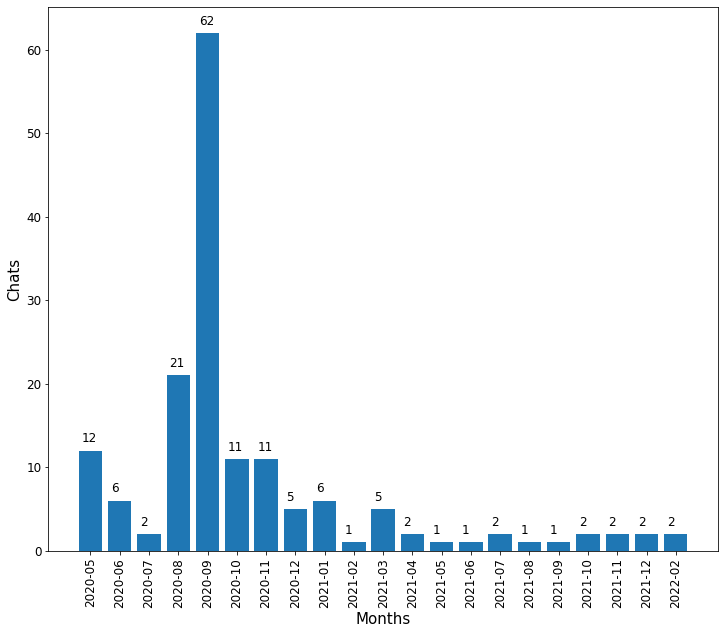

In [150]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import rcParams
#local_chats_aug_sep_dates.plot(legend=False, color='#4169E1', linewidth=2.0)


#chats_appeared_all.start_month = chats_appeared_all.start_month.dt.to_timestamp('s').dt.strftime('%Y-%m')

x = chats_appeared_all.start_month
y = chats_appeared_all.Counts   
rcParams['figure.figsize'] = 12, 10
plt.xlabel('Months', fontsize=15)
plt.ylabel('Chats', fontsize=15)
#dtFmt = mdates.DateFormatter('%Y %m') # define the formatting
#plt.gca().xaxis.set_major_formatter(dtFmt)
#ax.xaxis_date() 

#plt.title('The number of new chats appeared', fontsize=20)
#ax.xaxis.set_major_locator(mdates.AutoDateLocator()) 
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %m %d'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)




for tick in plt.gca().get_xticklabels():  
    
    tick.set_rotation(90)

plt.savefig('Number-of-the-new-chats-appeared.pdf')


pl= plt.bar(x = x, height = y)
for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.1, bar.get_height()+1), 
                     fontsize=12)
plt.show()

# Chats deactivated

In [127]:
chats_deactivated = chats_effective_dates [(chats_effective_dates['Maximum_Date']>='2020-08-01')
                                              & (chats_effective_dates['Maximum_Date']<='2022-01-01') ]

chats_deactivated.reset_index(inplace = True)  
print(f'Number of deactivated chats before war in Ukraine: {chats_deactivated.chat_id.count()}')
chats_deactivated

Number of deactivated chats before war in Ukraine: 51


,index,chat_id,Minimum_Date,Maximum_Date,start_month,end_month
0,11,1162978805,2020-09-06,2021-05-03,2020-09,2021-05
1,13,1164788011,2020-10-10,2021-01-30,2020-10,2021-01
2,15,1167246767,2020-08-29,2020-10-28,2020-08,2020-10
3,19,1176014195,2020-10-07,2020-11-15,2020-10,2020-11
4,21,1177298445,2020-09-05,2021-03-02,2020-09,2021-03
5,25,1182779201,2020-09-05,2021-05-27,2020-09,2021-05
6,32,1192448693,2020-09-04,2021-03-21,2020-09,2021-03
7,35,1198809542,2020-09-18,2021-09-23,2020-09,2021-09
8,36,1200218329,2020-11-03,2021-09-14,2020-11,2021-09
9,40,1211671194,2020-09-04,2021-03-21,2020-09,2021-03


In [430]:
chats_deactivated_after_war = chats_effective_dates [(chats_effective_dates['Maximum_Date']>='2020-08-01')
                                              & (chats_effective_dates['Maximum_Date']<='2022-02-28') ]

chats_deactivated_after_war.reset_index(inplace = True)  
print(f'Number of deactivated chats after the start of war in Ukraine: {chats_deactivated_after_war.chat_id.count()}')


Number of deactivated chats after the start of war in Ukraine: 56


In [128]:
#chats_deactivated_after_war.drop(columns= {'index'}, inplace = True)
chats_disappeared = chats_deactivated.groupby(['end_month']).size().reset_index(name='Counts')
chats_disappeared.sort_values (by = 'Counts', ascending= False) 

,end_month,Counts
5,2021-03,11
4,2021-02,9
7,2021-05,6
13,2021-12,5
10,2021-09,4
2,2020-12,3
3,2021-01,3
0,2020-10,2
1,2020-11,2
9,2021-08,2


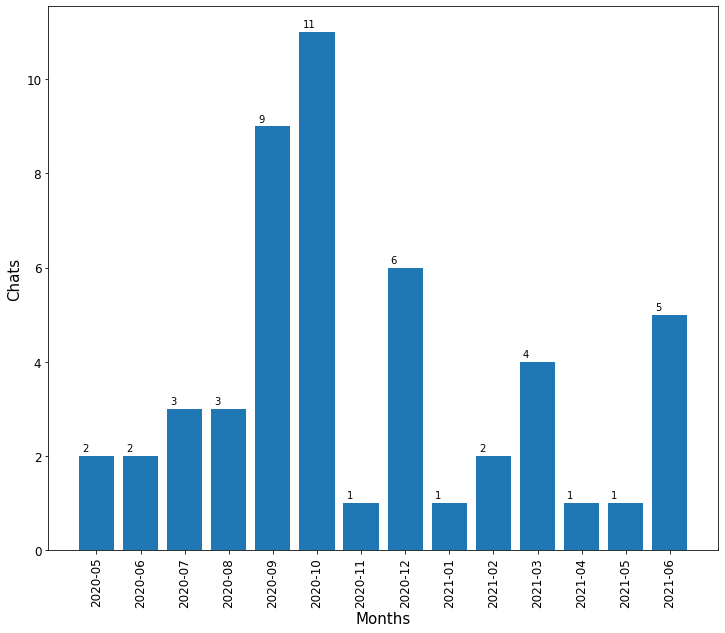

In [151]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#local_chats_aug_sep_dates.plot(legend=False, color='#4169E1', linewidth=2.0)


#x = mdates.datestr2num(chats_disappeared['Maximum_Date'].dt.strftime('%Y %m %d'))
#chats_disappeared.end_month = chats_disappeared.end_month.dt.to_timestamp('s').dt.strftime('%Y-%m')

x = chats_disappeared.end_month
y = chats_disappeared.Counts   
rcParams['figure.figsize'] = 12, 10
plt.xlabel('Months', fontsize=15)
plt.ylabel('Chats', fontsize=15)

#plt.title('The number of the deactivated chats ', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


for tick in plt.gca().get_xticklabels():  
    
    tick.set_rotation(90)

#plt.savefig('Number-of-posts-per-day-local-chats.pdf')


pl= plt.bar(x = x, height = y)
for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.07, bar.get_height()+0.1), 
                     fontsize=10)
plt.show()

In [ ]:
plt.style.use("fivethirtyeight")

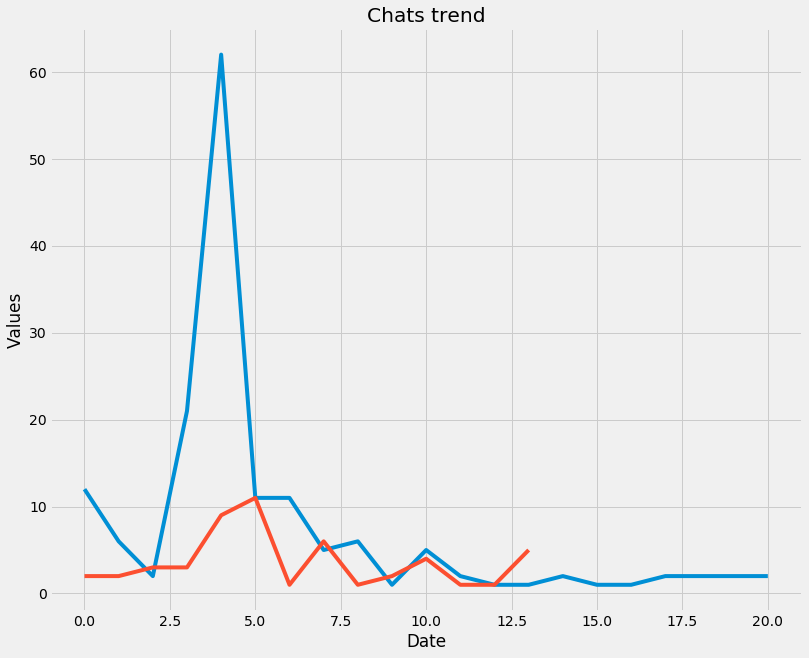

In [164]:
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

# Using a inbuilt style to change
# the look and feel of the plot
#plt.style.use("fivethirtyeight")

# setting figure size to 12, 10
plt.figure(figsize=(12, 10))

# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Chats trend")

# plotting the "A" column and "A" column
# of Rolling Dataframe (window_size = 20)
plt.plot(chats_appeared_all["Counts"])
plt.plot(chats_disappeared["Counts"])


In [172]:
chats_disappeared.rename(columns = {'end_month':'month'},inplace = True)
chats_appeared_all.rename(columns = {'start_month':'month'},inplace = True)

In [175]:
trend = chats_appeared_all.merge(chats_disappeared,  how='left', on='month')
trend.fillna(0)
trend.rename(columns = {'Counts_x':'appeared','Counts_y':'deactivated'},inplace = True)


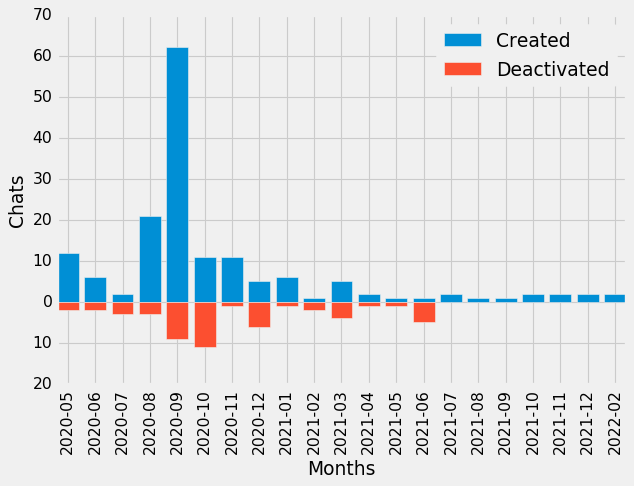

In [186]:
import matplotlib as mpl
mpl.style.use('classic')
d_1 = trend["appeared"]
d_2 = -1 * trend["deactivated"]
plt.style.use("fivethirtyeight")
y = trend.month
fig, ax = plt.subplots()
ax.bar(y, d_1, label = 'Created')
ax.bar(y, d_2, label = 'Deactivated')
ax.legend()
# Formatting x labels
plt.xticks(rotation=90)
plt.tight_layout()
# Use absolute value for y-ticks
ticks =  ax.get_yticks()
ax.set_yticklabels([int(abs(tick)) for tick in ticks])
plt.xlabel('Months')
plt.ylabel('Chats')
#plt.legend('Created','Deactivated')
plt.show()

In [162]:
data_orig = data

In [452]:
chats_deactivated_after_war.sort_values(by='Maximum_Date', ascending = False)
chats_deactivated_after_war

,chat_id,Minimum_Date,Maximum_Date
0,1107688298,2020-10-03,2020-10-07
1,1151456573,2020-09-30,2022-02-27
2,1156963786,2020-09-28,2022-02-27
3,1163964564,2020-09-03,2021-03-12
4,1167246767,2020-08-28,2022-02-27
5,1172478783,2020-11-13,2020-11-13
6,1184471068,2020-09-28,2022-02-27
7,1189678582,2020-09-07,2020-09-07
8,1192541819,2020-10-07,2020-10-07
9,1193023233,2020-09-09,2021-05-27


In [451]:
chats_lst = minsk_all_df[['chat_id','chat_title']]
chats_lst =chats_lst.drop_duplicates()
chats_lst

,chat_id,chat_title
0,1222496831,Услуги/подработка BY👷‍♂👷‍♀
0,1364248467,Наш_квартал_Запад-4 (73участок)
0,1427389839,[ЧАТ] Кальварийская-Бирюзова-Скрыганова
0,1434160204,Каменная горка 3 чат
0,1221114052,Ул. Алибегова г. Минск
...,...,...
0,1483451158,Зеленый Луг 67
0,1300189917,🌿 Зеленый Луг 🌿
0,1179688144,Зелёный Луг Паблик-чат
0,1265812307,Zhuk 6k1-3


In [455]:
chats_deactivated_after_war[chats_deactivated_after_war.Maximum_Date=='2022-02-27']

,chat_id,Minimum_Date,Maximum_Date
1,1151456573,2020-09-30,2022-02-27
2,1156963786,2020-09-28,2022-02-27
4,1167246767,2020-08-28,2022-02-27
6,1184471068,2020-09-28,2022-02-27
10,1201835645,2020-09-30,2022-02-27
14,1228236873,2020-09-04,2022-02-27
16,1241339739,2020-09-30,2022-02-27
19,1278958817,2020-09-28,2022-02-27
20,1295349068,2020-09-28,2022-02-27
34,1399648866,2020-09-30,2022-02-27


In [457]:
deactivated_27 = chats_deactivated_after_war[chats_deactivated_after_war.Maximum_Date=='2022-02-27'].chat_id
deactivated_27

1     1151456573
2     1156963786
4     1167246767
6     1184471068
10    1201835645
14    1228236873
16    1241339739
19    1278958817
20    1295349068
34    1399648866
37    1419450213
45    1473456758
47    1492404838
49    1495344294
50    1496251011
53    1540112098
Name: chat_id, dtype: int64

In [458]:
chats_lst[chats_lst.chat_id.isin(deactivated_27)] 

,chat_id,chat_title
0,1295349068,Белая Вежа Минск
0,1228236873,123 тест удалить
0,1184471068,Чурлениса Чюрлениса Чат
0,1399648866,Герасименко Байкальская Минск
0,1540112098,Чат Горовца
0,1496251011,"Корженевского, Кижеватова, Казинца"
0,1278958817,Ляховка Минск
0,1156963786,Народная Минск
0,1167246767,Наш двор 🏙️
0,1492404838,Партизанский 78


In [460]:
deactivated = chats_deactivated_after_war[chats_deactivated_after_war.Maximum_Date<'2022-02-27'].chat_id
#deactivated
chats_lst[chats_lst.chat_id.isin(deactivated)] 

,chat_id,chat_title
0,1364248467,Наш_квартал_Запад-4 (73участок)
0,1107688298,Минск Online
0,1247814686,Ботаника
0,1172478783,Захвачено Киберпартизанами
0,1497209257,Свободная Восточная 52
0,1300072882,Вильнюс
0,1443406298,Gerasimenko squad
0,1300032480,Грушвилль Грушевка чат
0,1423299257,"Кашары-Ляхаўка, Мiнск"
0,1215273627,"Кижеватова 78, 80/1, 80/2"


## Histogram

In [465]:
conda update --all

^C

Note: you may need to restart the kernel to use updated packages.


In [541]:
messages_by_chats

,chat_id,chat_title,message_date
0,1222496831,Услуги/подработка BY👷‍♂👷‍♀,2020-09-05
1,1222496831,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25
2,1222496831,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25
3,1222496831,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25
4,1222496831,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25
...,...,...,...
175,1473456758,Звязда 3(чат),2021-09-09
176,1473456758,Звязда 3(чат),2021-09-21
177,1473456758,Звязда 3(чат),2021-09-21
178,1473456758,Звязда 3(чат),2021-09-22


In [542]:
#data['month']=data.message_date.dt.to_period("M") 
#data

count_by_chat = messages_by_chats.groupby(['chat_id']).size().reset_index(name='counts')
count_by_chat

,chat_id,counts
0,1102482896,43392
1,1107688298,3
2,1113561399,1046
3,1113767475,2171
4,1118030129,308399
...,...,...
223,1540112098,5
224,1613149756,1041
225,1633868967,2
226,1691080428,10732


In [135]:
messages_by_chats = minsk_all_df[['chat_id','chat_title','message_date']]
count_by_chat = messages_by_chats.groupby(['chat_id']).size().reset_index(name='counts')
count_by_chat.sort_values(by='counts',ascending= False)

,chat_id,counts
4,1118030129,308399
127,1331127367,162343
154,1401016096,137194
166,1417875271,129831
215,1494370303,123253
...,...,...
44,1189678582,1
143,1367884086,1
142,1367761219,1
124,1319406967,1


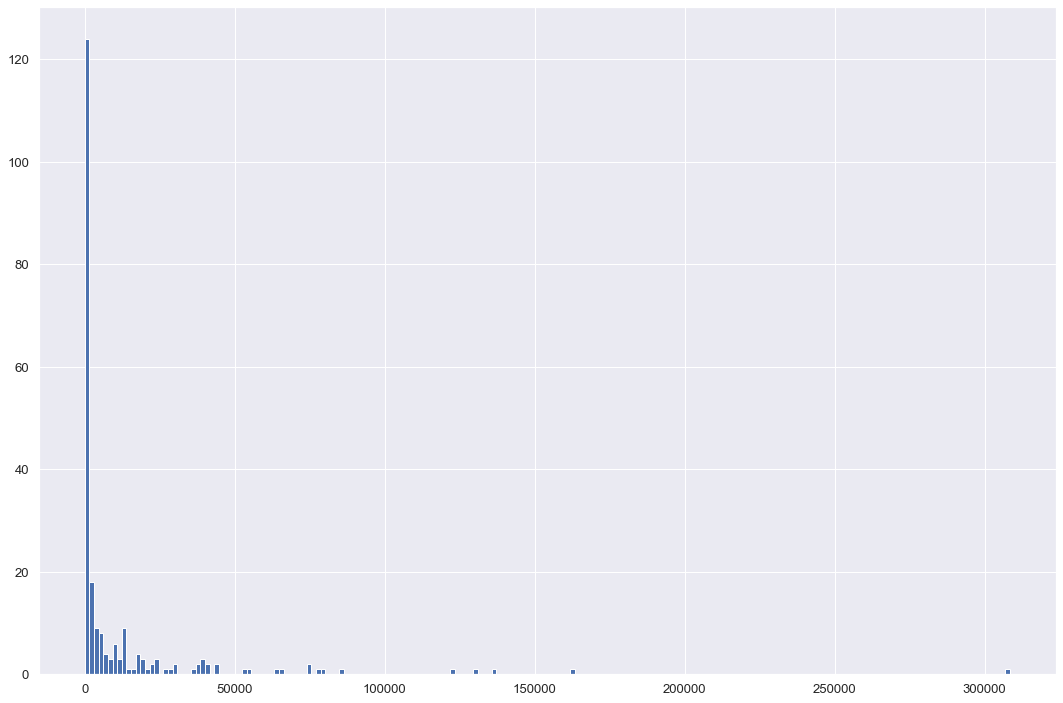

In [497]:
plt.hist(count_by_chat.counts, bins = 200)
plt.show()

In [528]:
count_by_chat[count_by_chat.counts<=20].sort_values( by = 'counts').count()

chat_title    53
counts        53
dtype: int64

In [136]:

qty_by_count = count_by_chat.groupby(['counts']).size().reset_index(name='qty')
qty_by_count

,counts,qty
0,1,6
1,2,12
2,3,12
3,4,4
4,5,4
...,...,...
182,123253,1
183,129831,1
184,137194,1
185,162343,1


Text(0, 0.5, 'Number of messages')

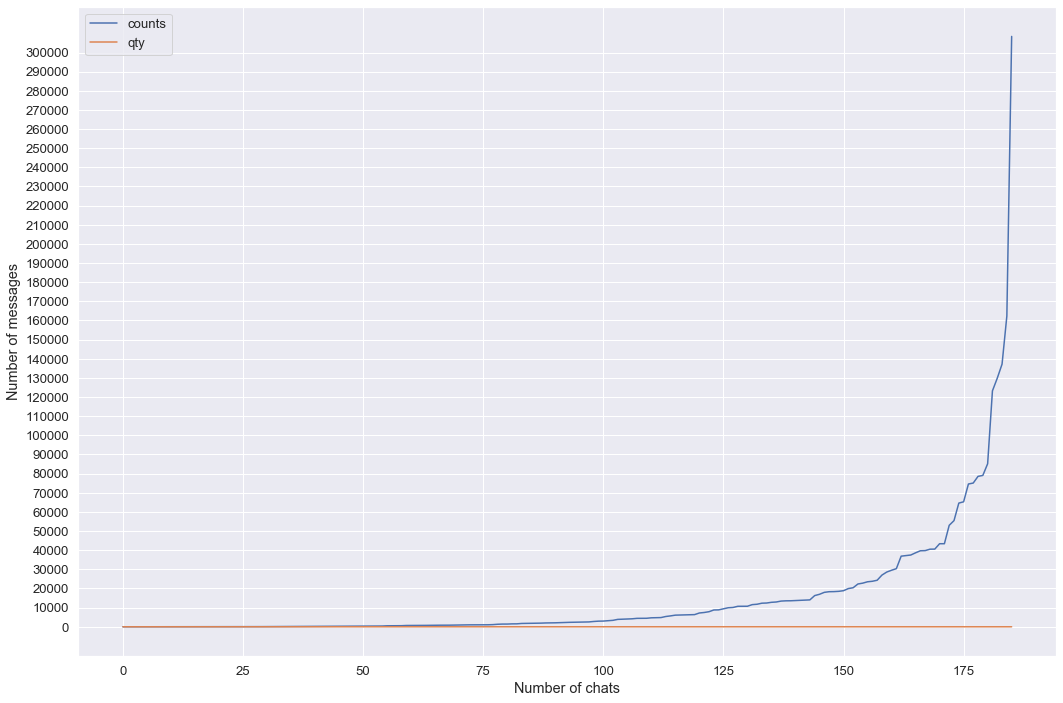

In [558]:
qty_by_count.plot()
plt.yticks(np.arange(0, 309000, 10000))
plt.xlabel('Number of chats')
plt.ylabel('Number of messages')


In [531]:
count_by_chat[count_by_chat.counts<=15].sort_values( by = 'counts').count()

chat_title    49
counts        49
dtype: int64

In [ ]:
count_by_chat[count_by_chat.counts<=15].chat_id

In [137]:
chats_exclude = count_by_chat[count_by_chat.counts<=15].chat_id
chats_exclude_lst=list(chats_exclude)
len(chats_exclude_lst)

49

In [150]:
chats_exclude_lst

[1107688298,
 1134148040,
 1151456573,
 1156963786,
 1167416261,
 1172478783,
 1174012960,
 1177972493,
 1184471068,
 1189678582,
 1192541819,
 1193023233,
 1201835645,
 1202904523,
 1215273627,
 1219209200,
 1224304843,
 1233382282,
 1238991004,
 1239635677,
 1241339739,
 1243843898,
 1244231610,
 1253321189,
 1265803714,
 1265984093,
 1278958817,
 1295349068,
 1300032480,
 1304446399,
 1319406967,
 1332947057,
 1364827558,
 1367761219,
 1367884086,
 1372992843,
 1392494458,
 1399648866,
 1419450213,
 1425673638,
 1430085045,
 1440506890,
 1441746032,
 1482499226,
 1492067983,
 1504963418,
 1540112098,
 1633868967,
 1710619796]

In [151]:
with open("file.txt", "w") as output:
    output.write(str(chats_exclude_lst))

In [537]:
chats_after_protests

,chat_id,Minimum_Date,Maximum_Date
0,1107688298,2020-10-03,2020-10-07
1,1113767475,2020-09-06,2022-04-09
2,1134148040,2020-09-04,2022-04-11
3,1143707420,2020-09-04,2022-04-07
4,1146967155,2020-09-07,2022-04-05
...,...,...,...
186,1494370303,2020-08-12,2022-04-10
187,1494852723,2020-08-10,2022-04-10
188,1496251011,2020-09-04,2022-02-27
189,1497209257,2020-09-05,2020-09-07


In [138]:
upd_chats_after_protests = chats_after_protests[~chats_after_protests['chat_id'].isin(chats_exclude_lst)]
upd_chats_after_protests
print(f'Number of chats that appeared after the protests: {upd_chats_after_protests.chat_id.count()}')

NameError: name 'chats_after_protests' is not defined

In [549]:
upd_chats_after_protests.sort_values(by='Maximum_Date')

,chat_id,Minimum_Date,Maximum_Date
189,1497209257,2020-09-05,2020-09-07
138,1403536366,2020-09-05,2020-09-21
112,1333881711,2020-09-04,2020-10-12
76,1247814686,2020-09-07,2021-01-16
171,1468611414,2020-11-16,2021-02-14
...,...,...,...
28,1178480216,2020-09-02,2022-04-11
172,1470206616,2020-08-30,2022-04-11
71,1241957084,2020-09-14,2022-04-11
149,1423668612,2020-08-12,2022-04-11


In [553]:
chats_deactivated = chats_effective_dates [(chats_effective_dates['Maximum_Date']>='2020-08-01')
                                              & (chats_effective_dates['Maximum_Date']<='2022-02-23') ]

chats_deactivated.reset_index(inplace = True)  
print(f'Number of deactivated chats before war in Ukraine: {chats_deactivated.chat_id.count()}')
chats_deactivated

Number of deactivated chats before war in Ukraine: 39


,index,chat_id,Minimum_Date,Maximum_Date
0,1,1107688298,2020-10-03,2020-10-07
1,19,1163964564,2020-09-03,2021-03-12
2,26,1172478783,2020-11-13,2020-11-13
3,44,1189678582,2020-09-07,2020-09-07
4,48,1192541819,2020-10-07,2020-10-07
5,49,1193023233,2020-09-09,2021-05-27
6,60,1211671194,2020-09-03,2021-03-21
7,65,1215273627,2020-09-07,2021-02-02
8,67,1219209200,2020-08-19,2021-11-05
9,78,1233382282,2021-01-09,2021-01-09


In [140]:
#excluding chats that have less 15 messages
upd_chats_effective_dates = chats_effective_dates[~chats_effective_dates['chat_id'].isin(chats_exclude_lst)]
upd_chats_effective_dates

,chat_id,Minimum_Date,Maximum_Date,delta
0,1102482896,2020-05-07,2022-04-10,703
2,1113561399,2020-05-03,2022-04-10,707
3,1113767475,2020-09-06,2022-04-09,580
4,1118030129,2020-05-01,2022-04-10,709
5,1120927488,2020-05-01,2022-04-10,709
...,...,...,...,...
219,1496251011,2020-09-04,2022-02-27,541
220,1497209257,2020-09-05,2020-09-07,2
221,1497848971,2020-09-06,2022-04-10,581
224,1613149756,2021-10-19,2022-04-10,173


In [563]:
upd_chats_deactivated.drop(columns= {'level_0'}, inplace = True)

In [565]:
upd_chats_deactivated = upd_chats_effective_dates[(chats_effective_dates['Maximum_Date']>='2020-08-01')
                                              & (chats_effective_dates['Maximum_Date']<='2022-02-23') ]
upd_chats_deactivated.reset_index(inplace = True)  
print(f'Number of deactivated chats before war in Ukraine: {upd_chats_deactivated.chat_id.count()}')
upd_chats_deactivated

Number of deactivated chats before war in Ukraine: 16


,index,chat_id,Minimum_Date,Maximum_Date
0,19,1163964564,2020-09-03,2021-03-12
1,60,1211671194,2020-09-03,2021-03-21
2,90,1247814686,2020-09-07,2021-01-16
3,117,1300072882,2020-09-05,2022-01-31
4,126,1324443904,2020-08-10,2021-09-06
5,130,1333881711,2020-09-04,2020-10-12
6,138,1352354277,2020-09-09,2021-05-20
7,140,1364248467,2020-08-31,2022-02-02
8,157,1403536366,2020-09-05,2020-09-21
9,161,1410233247,2020-08-18,2022-02-21


In [570]:
upd_chats_deactivated = upd_chats_effective_dates[(chats_effective_dates['Maximum_Date']>='2020-08-01')
                                              & (chats_effective_dates['Maximum_Date']<='2022-02-28') ]

upd_chats_deactivated.reset_index(inplace = True)  
print(f'Number of deactivated chats after start the war in Ukraine: {upd_chats_deactivated.chat_id.count()}')


Number of deactivated chats after start the war in Ukraine: 23


In [573]:
chats_deactivated_diff = upd_chats_effective_dates[(chats_effective_dates['Maximum_Date']>='2022-02-23')
                                              & (chats_effective_dates['Maximum_Date']<='2022-03-01') ]

chats_deactivated_diff.reset_index(inplace = True)  
print(f'Number of deactivated chats from 23.02 to 15.03: {chats_deactivated_diff .chat_id.count()}')
chats_deactivated_diff 
diff_lst = chats_deactivated_diff.chat_id

Number of deactivated chats from 23.02 to 15.03: 7


In [577]:
upd_chats_deactivated_lst = list(upd_chats_deactivated.chat_id)
print(f'Deactivated chats: ')
chats_lst[chats_lst.chat_id.isin(upd_chats_deactivated_lst)]


Deactivated chats: 


,chat_id,chat_title
0,1364248467,Наш_квартал_Запад-4 (73участок)
0,1247814686,Ботаника
0,1228236873,123 тест удалить
0,1467755856,Гуляем по бульвару!
0,1497209257,Свободная Восточная 52
0,1300072882,Вильнюс
0,1443406298,Gerasimenko squad
0,1423299257,"Кашары-Ляхаўка, Мiнск"
0,1496251011,"Корженевского, Кижеватова, Казинца"
0,1352354277,Колесникова 4_6_8_10. Политика.


RQ1: are number of chats increasing but number of messages per chat is decreasing? If the liveliness (length of being alive) of chats also decreases


make a df with the count of chats by weeks

In [14]:
minsk_all_df

,chat_title,chat_id,message_id,message_from_id,message_text,message_out,message_post,message_date,message_replies,message_media,message_views
0,Услуги/подработка BY👷‍♂👷‍♀,1222496831,1,NaN,NaN,False,False,2020-09-05,NaN,NaN,NaN
1,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4748,NaN,⚡️Приветствую вас в нашем чате!\nПожалуйста оз...,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",NaN,NaN
2,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4757,PeerUser(user_id=489380546),NaN,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",MessageMediaPhoto(photo=Photo(id=5328035458040...,NaN
3,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4768,PeerUser(user_id=1036355565),Добрый день. Я работаю в страховой компании Бе...,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",NaN,NaN
4,Услуги/подработка BY👷‍♂👷‍♀,1222496831,4782,PeerUser(user_id=771637505),NaN,False,False,2020-11-25,"MessageReplies(replies=0, replies_pts=18225, c...",MessageMediaPhoto(photo=Photo(id=5327758638808...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
175,Звязда 3(чат),1473456758,311,PeerUser(user_id=253065191),NaN,False,False,2021-09-09,NaN,NaN,NaN
176,Звязда 3(чат),1473456758,312,PeerUser(user_id=1995404261),NaN,False,False,2021-09-21,NaN,NaN,NaN
177,Звязда 3(чат),1473456758,313,PeerUser(user_id=1995404261),NaN,False,False,2021-09-21,NaN,NaN,NaN
178,Звязда 3(чат),1473456758,318,PeerUser(user_id=749011046),Кто нибудь ещё слышит этот гул?,False,False,2021-09-22,"MessageReplies(replies=0, replies_pts=470, com...",NaN,NaN


In [28]:
#counting messages by weeks
mess_by_weeks = minsk_all_df[['chat_title','message_date','message_text']]
mess_by_weeks['message_date'] = pd.to_datetime(mess_by_weeks['message_date'], format='%Y-%m-%d')
mess_by_weeks['week_number']= mess_by_weeks['message_date'].dt.week
mess_by_weeks['month']= mess_by_weeks['message_date'].dt.month
mess_by_weeks['year'] = pd.DatetimeIndex(mess_by_weeks['message_date']).year
mess_by_weeks= mess_by_weeks.reset_index()
mess_by_weeks.drop(columns = {'index'}, inplace = True)

In [29]:
mess_by_weeks[mess_by_weeks['month'] == 1 & (mess_by_weeks['week_number'] > 50)]

,chat_title,message_date,message_text,week_number,month,year
371,Услуги/подработка BY👷‍♂👷‍♀,2021-01-01,"Маникюр , уручье , шугаева , сухожар . Вопросы...",53,1,2021
372,Услуги/подработка BY👷‍♂👷‍♀,2021-01-01,"Добрый день, разбито окно в балконной двери: н...",53,1,2021
373,Услуги/подработка BY👷‍♂👷‍♀,2021-01-02,"Здравствуйте, могу оказывать помощь в изучении...",53,1,2021
374,Услуги/подработка BY👷‍♂👷‍♀,2021-01-03,NaN,53,1,2021
375,Услуги/подработка BY👷‍♂👷‍♀,2021-01-03,NaN,53,1,2021
...,...,...,...,...,...,...
2719497,🌿 Зеленый Луг 🌿,2022-01-01,NaN,52,1,2022
2719498,🌿 Зеленый Луг 🌿,2022-01-01,Забрали классные люди у них такая же. Я бы поб...,52,1,2022
2719499,🌿 Зеленый Луг 🌿,2022-01-01,Это коржик? Если да то я такую видела месяца п...,52,1,2022
2719500,🌿 Зеленый Луг 🌿,2022-01-01,"Вы имеете ввиду корги? Если да, то нет, это не...",52,1,2022


In [30]:
mess_by_weeks.loc[mess_by_weeks[(mess_by_weeks['month']) == 1 & (mess_by_weeks['week_number'] > 49)].index, 'week_number'] = 1

In [31]:
mess_by_weeks 

,chat_title,message_date,message_text,week_number,month,year
0,Услуги/подработка BY👷‍♂👷‍♀,2020-09-05,NaN,36,9,2020
1,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,⚡️Приветствую вас в нашем чате!\nПожалуйста оз...,48,11,2020
2,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,NaN,48,11,2020
3,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,Добрый день. Я работаю в страховой компании Бе...,48,11,2020
4,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,NaN,48,11,2020
...,...,...,...,...,...,...
2724209,Звязда 3(чат),2021-09-09,NaN,36,9,2021
2724210,Звязда 3(чат),2021-09-21,NaN,38,9,2021
2724211,Звязда 3(чат),2021-09-21,NaN,38,9,2021
2724212,Звязда 3(чат),2021-09-22,Кто нибудь ещё слышит этот гул?,38,9,2021


In [632]:
#mess_by_weeks['message_date'].dt.strftime('%Y%m%d')

0      20200905
1      20201125
2      20201125
3      20201125
4      20201125
         ...   
175    20210909
176    20210921
177    20210921
178    20210922
179    20220227
Name: message_date, Length: 2724214, dtype: object

In [810]:
####Sanity check

mess_by_weeks2 = minsk_all_df[['chat_title','message_date','message_text']]
mess_by_weeks2['week_number']= mess_by_weeks2['message_date'].dt.week
#mess_by_weeks2[(mess_by_weeks2['month'] == 11) & (mess_by_weeks2['week_number'] ==1)]
mess_by_weeks2['month']= mess_by_weeks2['message_date'].dt.month
mess_by_weeks = mess_by_weeks2
mess_by_weeks2

,chat_title,message_date,message_text,week_number,month
0,Услуги/подработка BY👷‍♂👷‍♀,2020-09-05,NaN,36,9
1,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,⚡️Приветствую вас в нашем чате!\nПожалуйста оз...,48,11
2,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,NaN,48,11
3,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,Добрый день. Я работаю в страховой компании Бе...,48,11
4,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,NaN,48,11
...,...,...,...,...,...
175,Звязда 3(чат),2021-09-09,NaN,36,9
176,Звязда 3(чат),2021-09-21,NaN,38,9
177,Звязда 3(чат),2021-09-21,NaN,38,9
178,Звязда 3(чат),2021-09-22,Кто нибудь ещё слышит этот гул?,38,9


In [34]:
df = mess_by_weeks[['chat_title','week_number','month','year']]
df['period']= df['week_number'].astype(str) + '-' + df['year'].astype(str) 
df= df.sort_values(by=['year', 'week_number'])
df = df.reset_index()
chats_by_periods = df

In [811]:
mess_by_weeks2[(mess_by_weeks2['month'] > 1) & (mess_by_weeks2['week_number'] == 1)]
#mess_by_weeks2[mess_by_weeks2['week_number'] == 1]

,chat_title,message_date,message_text,week_number,month


In [36]:
chats_by_periods.drop(columns = {'index'},inplace = True)
chats_by_periods

,chat_title,week_number,month,year,period
0,Минск Мир чат / Minsk World Chat,18,5,2020,18-2020
1,Минск Мир чат / Minsk World Chat,18,5,2020,18-2020
2,Минск Мир чат / Minsk World Chat,18,5,2020,18-2020
3,Минск Мир чат / Minsk World Chat,18,5,2020,18-2020
4,Минск Мир чат / Minsk World Chat,18,5,2020,18-2020
...,...,...,...,...,...
2724209,"Щомыслица,Прилукская Слобода.",15,4,2022,15-2022
2724210,"Щомыслица,Прилукская Слобода.",15,4,2022,15-2022
2724211,"Щомыслица,Прилукская Слобода.",15,4,2022,15-2022
2724212,Спортивная 97%,15,4,2022,15-2022


In [37]:
#sanity ---ok
df[(df['month'] > 1) & (df['week_number'] == 1)]

,chat_title,week_number,month,year,period


In [39]:
#checking again
mess_by_weeks[(mess_by_weeks['year'] == 2022) & (mess_by_weeks['week_number'] >20)]

,chat_title,message_date,message_text,week_number,month,year


In [40]:
mess_by_weeks[(mess_by_weeks['month'] >1) & (mess_by_weeks['week_number'] == 1)]

,chat_title,message_date,message_text,week_number,month,year


In [41]:
mess_by_weeks

,chat_title,message_date,message_text,week_number,month,year
0,Услуги/подработка BY👷‍♂👷‍♀,2020-09-05,NaN,36,9,2020
1,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,⚡️Приветствую вас в нашем чате!\nПожалуйста оз...,48,11,2020
2,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,NaN,48,11,2020
3,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,Добрый день. Я работаю в страховой компании Бе...,48,11,2020
4,Услуги/подработка BY👷‍♂👷‍♀,2020-11-25,NaN,48,11,2020
...,...,...,...,...,...,...
2724209,Звязда 3(чат),2021-09-09,NaN,36,9,2021
2724210,Звязда 3(чат),2021-09-21,NaN,38,9,2021
2724211,Звязда 3(чат),2021-09-21,NaN,38,9,2021
2724212,Звязда 3(чат),2021-09-22,Кто нибудь ещё слышит этот гул?,38,9,2021


In [42]:
mess_weekly_count =chats_by_periods.groupby(['week_number', 'year','period', 'month']).count().sort_values(by=['year', 'week_number'], ascending  = False).reset_index()
#mess_weekly.drop(columns = {'week_number', 'year'}, inplace = True)
mess_weekly_count = mess_weekly_count.sort_values(by=['year', 'week_number'])
mess_weekly_count = mess_weekly_count.reset_index()  
mess_weekly_count.drop(columns = {'index'}, inplace = True)

mess_weekly_count

,week_number,year,period,month,chat_title
0,18,2020,18-2020,5,1062
1,19,2020,19-2020,5,2491
2,20,2020,20-2020,5,2846
3,21,2020,21-2020,5,3041
4,22,2020,22-2020,5,2421
...,...,...,...,...,...
115,12,2022,12-2022,3,12309
116,13,2022,13-2022,3,8596
117,13,2022,13-2022,4,5585
118,14,2022,14-2022,4,15562


In [892]:
#mess_weekly['week']= mess_weekly.index
#mess_weekly

,week_number,year,period,month,chat_title,week
0,18,2020,18-2020,5,1062,0
1,19,2020,19-2020,5,2491,1
2,20,2020,20-2020,5,2846,2
3,21,2020,21-2020,5,3041,3
4,22,2020,22-2020,5,2421,4
...,...,...,...,...,...,...
115,12,2022,12-2022,3,12309,115
116,13,2022,13-2022,3,8596,116
117,13,2022,13-2022,4,5585,117
118,14,2022,14-2022,4,15562,118


In [43]:
message_count = mess_weekly_count[['week_number','period', 'year','chat_title']]
message_count.rename(columns={'chat_title': 'counts'},inplace = True)
message_count

,week_number,period,year,counts
0,18,18-2020,2020,1062
1,19,19-2020,2020,2491
2,20,20-2020,2020,2846
3,21,21-2020,2020,3041
4,22,22-2020,2020,2421
...,...,...,...,...
115,12,12-2022,2022,12309
116,13,13-2022,2022,8596
117,13,13-2022,2022,5585
118,14,14-2022,2022,15562


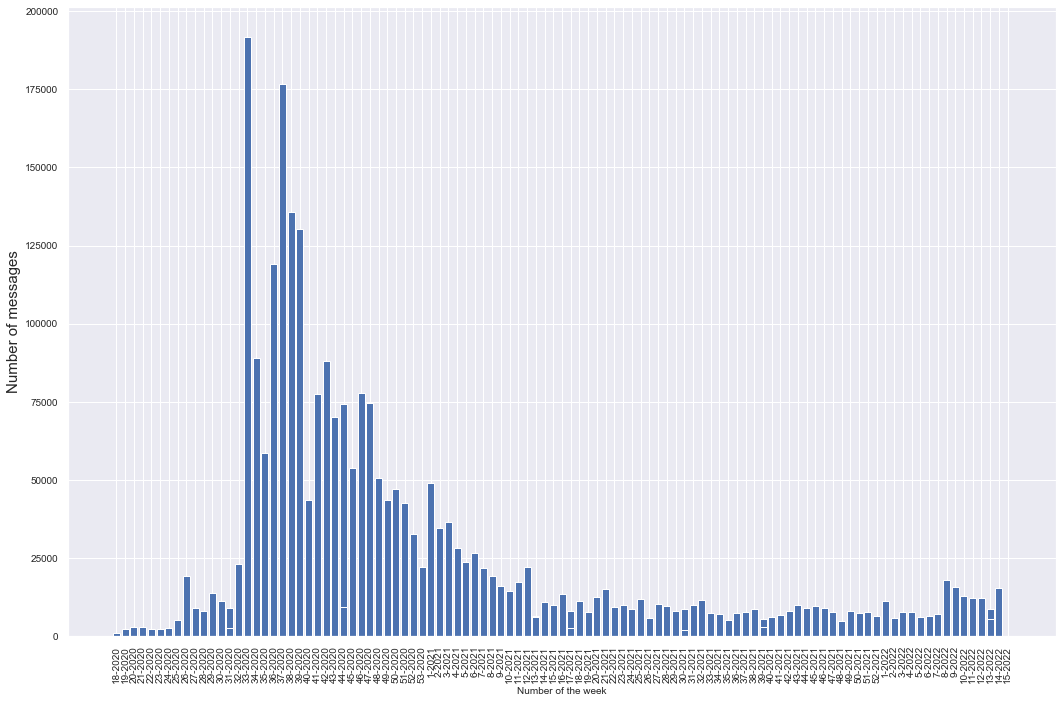

In [908]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#local_chats_aug_sep_dates.plot(legend=False, color='#4169E1', linewidth=2.0)


x = message_count.period
y = message_count.counts   
rcParams['figure.figsize'] = 15, 10
plt.xlabel('Number of the week', fontsize=10)

plt.ylabel('Number of messages', fontsize=15)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


for tick in plt.gca().get_xticklabels():      
    tick.set_rotation(90)

#plt.savefig('Number-of-posts-per-day-local-chats.pdf')


pl= plt.bar(x = x, height = y)
"""for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.07, bar.get_height()+1), 
                     fontsize=10)"""
plt.show()

# Chats

In [44]:
chats = chats_by_periods.drop_duplicates()
chats.drop(columns = 'month', inplace = True)
chats = chats.drop_duplicates()
chats = chats.reset_index()
chats.drop(columns={'index'},inplace = True)
chats

,chat_title,week_number,year,period
0,Минск Мир чат / Minsk World Chat,18,2020,18-2020
1,Каменная Горка,18,2020,18-2020
2,ЖК «Колизей»: Разговоры,18,2020,18-2020
3,Красный Бор 1,18,2020,18-2020
4,Менск: война пришла вместе с оккупантами - ПОР...,18,2020,18-2020
...,...,...,...,...
9420,Пушкари Lounge,15,2022,15-2022
9421,Севастопольский вечер,15,2022,15-2022
9422,"Щомыслица,Прилукская Слобода.",15,2022,15-2022
9423,Спортивная 97%,15,2022,15-2022


In [727]:
chats_weekly.week_number = chats_weekly.week_number.astype(int)
chats_weekly.year = chats_weekly.year.astype(int)
#chats_week = chats_weekly.sort_values(by=['year','week_number'], ascending=True)
chats_weekly.sort_values(by=['week_number',], ascending=True)
#chats_week.sort_values(by=[''])

,index,week_number,year,period,chat_title
0,103,1,2020,1-2020,173
89,14,1,2022,1-2022,150
37,66,1,2021,1-2021,165
38,65,2,2021,2-2021,125
90,13,2,2022,2-2022,77
...,...,...,...,...,...
87,16,51,2021,51-2021,85
34,69,51,2020,51-2020,118
35,68,52,2020,52-2020,125
88,15,52,2021,52-2021,88


In [902]:
chats_weekly = chats.groupby(['week_number', 'year','period']).count().sort_values(by=['year', 'week_number'], ascending  = False).reset_index()
#chats_weekly.drop(columns = {'week_number', 'year'}, inplace = True)
chats_weekly = chats_weekly.sort_values(by=['year', 'week_number'])
chats_weekly = chats_weekly.reset_index()  
chats_weekly

,index,week_number,year,period,chat_title
0,102,18,2020,18-2020,11
1,101,19,2020,19-2020,12
2,100,20,2020,20-2020,13
3,99,21,2020,21-2020,13
4,98,22,2020,22-2020,12
...,...,...,...,...,...
98,4,11,2022,11-2022,101
99,3,12,2022,12-2022,95
100,2,13,2022,13-2022,96
101,1,14,2022,14-2022,144


In [903]:
chats_weekly.rename(columns = {'chat_title':'chat'}, inplace = True)

In [929]:
chats_weekly = chats_weekly.sort_values(by = 'chat', ascending = False)
#chats_weekly.drop(columns  = {'index'}, inplace = True)
chats_weekly.head(20)

,week_number,year,period,chat
101,14,2022,14-2022,144
34,52,2020,52-2020,133
22,40,2020,40-2020,132
37,2,2021,2-2021,132
32,50,2020,50-2020,132
38,3,2021,3-2021,131
36,1,2021,1-2021,131
19,37,2020,37-2020,131
40,5,2021,5-2021,130
18,36,2020,36-2020,130


In [932]:
chats_weekly.info()
message_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 101 to 102
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   week_number  103 non-null    int64 
 1   year         103 non-null    int64 
 2   period       103 non-null    object
 3   chat         103 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 17 to 119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   week_number  120 non-null    int64 
 1   period       120 non-null    object
 2   year         120 non-null    int64 
 3   counts       120 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.7+ KB


In [925]:
message_count= message_count.sort_values(by = 'counts', ascending = False)
message_count.head(20)

,week_number,period,year,counts
17,33,33-2020,2020,191739
22,37,37-2020,2020,176793
23,38,38-2020,2020,135738
24,39,39-2020,2020,130228
21,36,36-2020,2020,119131
18,34,34-2020,2020,89044
28,42,42-2020,2020,87934
33,46,46-2020,2020,77698
27,41,41-2020,2020,77365
34,47,47-2020,2020,74493


In [945]:
#weekly_stats = message_count.join(chats_weekly,on='period',how='inner')
#weekly_stats
df_merged = message_count.merge(chats_weekly[['period', 'chat']],  how='left', on='period')
df_merged['ratio'] = df_merged.chat/df_merged.counts*100
df_merged['avg_number'] = df_merged.counts/df_merged.chat
df_merged = df_merged.drop(index = df_merged[df_merged['period']=='15-2022'].index)
df_merged.sort_values(by = 'avg_number', ascending = False)



,week_number,period,year,counts,chat,ratio,avg_number
0,33,33-2020,2020,191739,45,0.023469,4260.866667
5,34,34-2020,2020,89044,40,0.044922,2226.100000
1,37,37-2020,2020,176793,131,0.074098,1349.564885
12,35,35-2020,2020,58792,47,0.079943,1250.893617
2,38,38-2020,2020,135738,121,0.089142,1121.801653
...,...,...,...,...,...,...,...
108,17,17-2021,2021,2580,103,3.992248,25.048544
114,48,48-2021,2021,2078,89,4.282964,23.348315
115,30,30-2021,2021,1989,97,4.876823,20.505155
116,22,22-2021,2021,1406,98,6.970128,14.346939


In [776]:
chats['year']=chats['year'].astype('int')
chats['week_number']=chats['week_number'].astype('int')

In [777]:
chats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8938 entries, 1 to 22797
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   chat_title   8938 non-null   object
 1   week_number  8938 non-null   int32 
 2   year         8938 non-null   int32 
 3   period       8938 non-null   object
dtypes: int32(2), object(2)
memory usage: 279.3+ KB


In [746]:
import datetime
from dateutil.relativedelta import relativedelta
def get_date(year, week):
    return datetime.date(year, 1, 1) + relativedelta(weeks=+week)


In [766]:
get_date(2022,3)

datetime.date(2022, 1, 22)

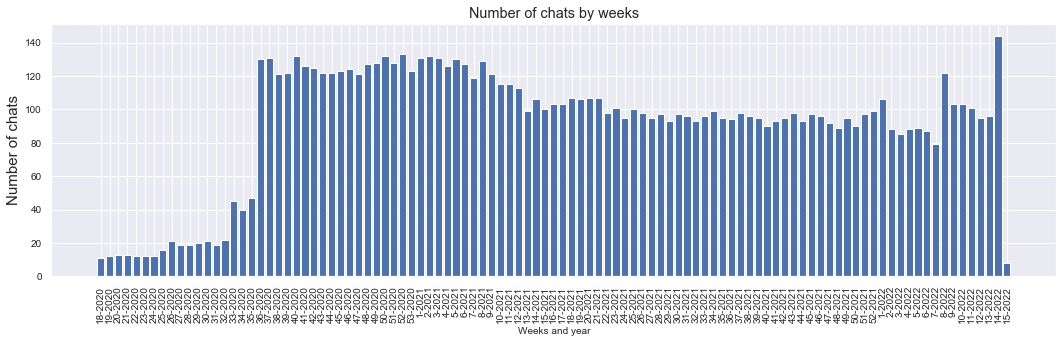

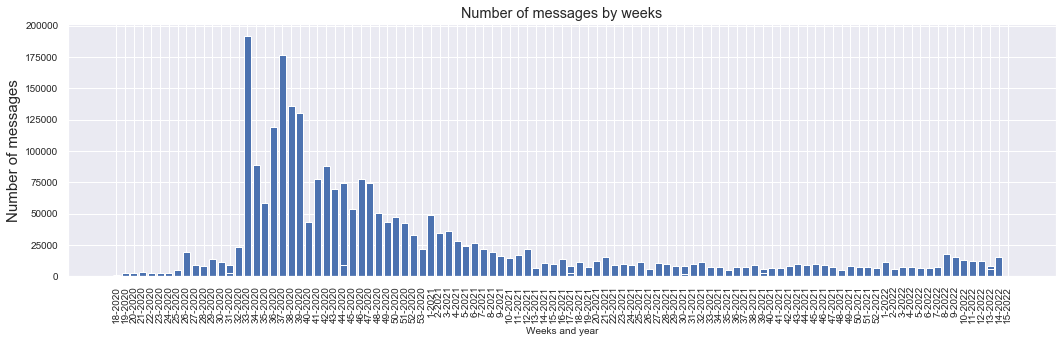

In [916]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#local_chats_aug_sep_dates.plot(legend=False, color='#4169E1', linewidth=2.0)


x = chats_weekly.period
y = chats_weekly.chat   
rcParams['figure.figsize'] = 15, 5
plt.xlabel('Weeks and year', fontsize=10)

plt.ylabel('Number of chats', fontsize=15)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Number of chats by weeks')



for tick in plt.gca().get_xticklabels():  
    
    tick.set_rotation(90)

#plt.savefig('Number-of-posts-per-day-local-chats.pdf')


pl= plt.bar(x = x, height = y)

plt.show()


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#local_chats_aug_sep_dates.plot(legend=False, color='#4169E1', linewidth=2.0)


x = message_count.period
y = message_count.counts   
rcParams['figure.figsize'] = 15, 5
plt.xlabel('Weeks and year', fontsize=10)
plt.ylabel('Number of messages', fontsize=15)
plt.title('Number of messages by weeks')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


for tick in plt.gca().get_xticklabels():      
    tick.set_rotation(90)

#plt.savefig('Number-of-posts-per-day-local-chats.pdf')


pl= plt.bar(x = x, height = y)

plt.show()

In [784]:
chats_by_weeks[chats_by_weeks.index == '01-2020']

,week_number,year,period,month,chat_title,week


In [782]:
chats_weekly['date'] = chats_weekly.apply(lambda x: get_date(x.year, x.week_number), axis=1)
chats_weekly

,index,week_number,year,period,chat_title,date
0,103,1,2020,1-2020,173,2020-01-08
1,102,18,2020,18-2020,11,2020-05-06
2,101,19,2020,19-2020,12,2020-05-13
3,100,20,2020,20-2020,12,2020-05-20
4,99,21,2020,21-2020,13,2020-05-27
...,...,...,...,...,...,...
99,4,11,2022,11-2022,85,2022-03-19
100,3,12,2022,12-2022,86,2022-03-26
101,2,13,2022,13-2022,86,2022-04-02
102,1,14,2022,14-2022,127,2022-04-09


In [ ]:
make a df with the count of messages by weeks

Count active days
chats that were created on a specific date were active N amount of days


In [963]:
chats_effective_dates['min'] = datetime.datetime.strpdate('Minimum_Date', "%Y-%m-%d").date()

AttributeError: type object 'datetime.datetime' has no attribute 'strpdate'

## Chat effective dates 

In [126]:
#chats_effective_dates['min'] = datetime.datetime.strptime(min, "%Y-%m-%d").date()
#rdate1 = datetime.datetime.strptime(rdate, "%Y-%m-%d").date()
#delta =  (mdate1 - rdate1).days
chats_effective_dates['delta'] = (chats_effective_dates.Maximum_Date - chats_effective_dates.Minimum_Date).dt.days
chats_effective_dates

,chat_id,Minimum_Date,Maximum_Date,delta
0,1102482896,2020-05-07,2022-04-10,703
1,1107688298,2020-10-03,2020-10-07,4
2,1113561399,2020-05-03,2022-04-10,707
3,1113767475,2020-09-06,2022-04-09,580
4,1118030129,2020-05-01,2022-04-10,709
...,...,...,...,...
223,1540112098,2021-12-31,2022-02-27,58
224,1613149756,2021-10-19,2022-04-10,173
225,1633868967,2022-01-03,2022-01-03,0
226,1691080428,2022-03-01,2022-04-10,40


In [129]:
#chats_effective_dates = chats_effective_dates['chat_id'].astype('str')
chats_effective_dates_disrt= chats_effective_dates[['chat_id', 'delta']]
chats_effective_dates_disrt['chat_id'] =chats_effective_dates_disrt['chat_id'].astype('str')
#chats_effective_dates

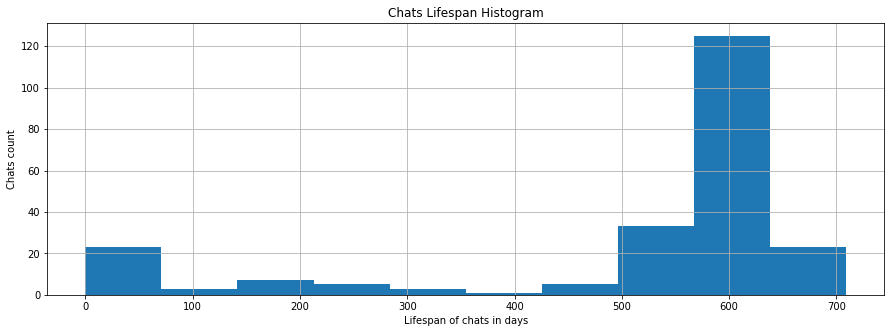

In [147]:
chats_effective_dates_disrt.hist()
plt.xlabel('Lifespan of chats in days')
plt.ylabel('Chats count')
plt.title('Chats Lifespan Histogram')
plt.show()

In [ ]:
upd_chats_effective_dates['delta'] = (upd_chats_effective_dates.Maximum_Date - upd_chats_effective_dates.Minimum_Date).dt.days
upd_chats_effective_dates

In [142]:
upd_chats_effective_dates['chat_id'] = upd_chats_effective_dates['chat_id'].astype('str')
upd_chats_effective_dates_disrt = upd_chats_effective_dates[['chat_id', 'delta']]

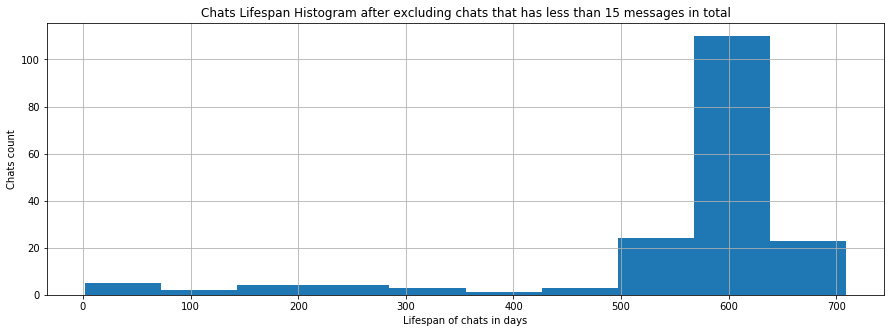

In [149]:
upd_chats_effective_dates_disrt.hist()
plt.xlabel('Lifespan of chats in days')
plt.ylabel('Chats count')
plt.title('Chats Lifespan Histogram after excluding chats that has less than 15 messages in total')
plt.show()

In [977]:
chat_effective =chats_effective_dates[['chat_id', 'Minimum_Date', 'delta']]
chat_effective= chat_effective.sort_values(by='delta',ascending  = False)
chat_effective['chat_id'] = chat_effective['chat_id'].astype(str) 

In [979]:
fig = px.box(chat_effective, x="Minimum_Date", y="delta")
fig.show()

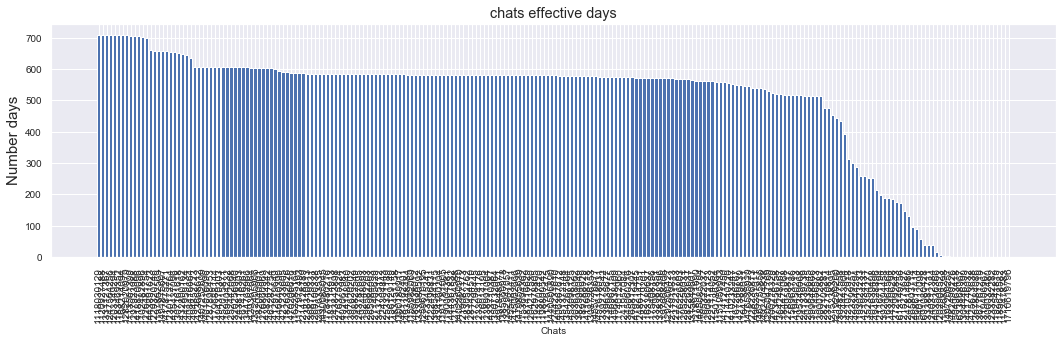

In [980]:

x = chat_effective.chat_id
y = chat_effective.delta   
rcParams['figure.figsize'] = 15, 5
plt.xlabel('Chats', fontsize=10)
plt.ylabel('Number days', fontsize=15)
plt.title('chats effective days')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


for tick in plt.gca().get_xticklabels():      
    tick.set_rotation(90)

#plt.savefig('Number-of-posts-per-day-local-chats.pdf')


pl= plt.bar(x = x, height = y)

plt.show()

In [987]:
chat_effective.describe()
chat_effective[chat_effective['delta']<400].count()

chat_effective['week'] = chat_effective['Minimum_Date'].dt.week
chat_effective['year']= chat_effective['Minimum_Date'].dt.year
chat_effective

,chat_id,Minimum_Date,delta,week,year
4,1118030129,2020-05-01,709,18,2020
5,1120927488,2020-05-01,709,18,2020
127,1331127367,2020-05-01,709,18,2020
89,1247564256,2020-05-01,709,18,2020
56,1203349294,2020-05-01,709,18,2020
...,...,...,...,...,...
78,1233382282,2021-01-09,0,1,2021
48,1192541819,2020-10-07,0,41,2020
44,1189678582,2020-09-07,0,37,2020
26,1172478783,2020-11-13,0,46,2020


In [12]:
active_inactive = chats_effective_dates
active_inactive

,chat_id,Minimum_Date,Maximum_Date
0,1102482896,2020-05-07,2022-04-10
1,1107688298,2020-10-03,2020-10-07
2,1113561399,2020-05-03,2022-04-10
3,1113767475,2020-09-06,2022-04-09
4,1118030129,2020-05-01,2022-04-10
...,...,...,...
223,1540112098,2021-12-31,2022-02-27
224,1613149756,2021-10-19,2022-04-10
225,1633868967,2022-01-03,2022-01-03
226,1691080428,2022-03-01,2022-04-10


In [45]:
chats_by_periods

,chat_title,week_number,month,year,period
0,Минск Мир чат / Minsk World Chat,18,5,2020,18-2020
1,Минск Мир чат / Minsk World Chat,18,5,2020,18-2020
2,Минск Мир чат / Minsk World Chat,18,5,2020,18-2020
3,Минск Мир чат / Minsk World Chat,18,5,2020,18-2020
4,Минск Мир чат / Minsk World Chat,18,5,2020,18-2020
...,...,...,...,...,...
2724209,"Щомыслица,Прилукская Слобода.",15,4,2022,15-2022
2724210,"Щомыслица,Прилукская Слобода.",15,4,2022,15-2022
2724211,"Щомыслица,Прилукская Слобода.",15,4,2022,15-2022
2724212,Спортивная 97%,15,4,2022,15-2022


In [48]:
chats[chats['chat_title']=='Минск Мир чат / Minsk World Chat'].sort_values(by=['year','week_number'])

,chat_title,week_number,year,period
0,Минск Мир чат / Minsk World Chat,18,2020,18-2020
11,Минск Мир чат / Minsk World Chat,19,2020,19-2020
23,Минск Мир чат / Minsk World Chat,20,2020,20-2020
36,Минск Мир чат / Minsk World Chat,21,2020,21-2020
49,Минск Мир чат / Minsk World Chat,22,2020,22-2020
...,...,...,...,...
8900,Минск Мир чат / Minsk World Chat,10,2022,10-2022
9002,Минск Мир чат / Minsk World Chat,11,2022,11-2022
9101,Минск Мир чат / Minsk World Chat,12,2022,12-2022
9194,Минск Мир чат / Minsk World Chat,13,2022,13-2022


In [53]:
chats['period_next'] = chats['period'].shift(-1)
chats.drop(columns = {'period_next'}, inplace = True)

In [55]:
chats = chats.sort_values(by=['chat_title','year','week_number'])

In [93]:
active_inactive = chats[['chat_title','period','year','week_number']].copy()
active_inactive['next_period'] = chats.groupby(
    ["chat_title"]).period.shift(-1)
active_inactive

,chat_title,period,year,week_number,next_period
1811,(Резерв) Михаловская - Алибегова - Брыля,47-2020,2020,47,50-2020
2193,(Резерв) Михаловская - Алибегова - Брыля,50-2020,2020,50,51-2020
2324,(Резерв) Михаловская - Алибегова - Брыля,51-2020,2020,51,52-2020
2454,(Резерв) Михаловская - Алибегова - Брыля,52-2020,2020,52,53-2020
2584,(Резерв) Михаловская - Алибегова - Брыля,53-2020,2020,53,1-2021
...,...,...,...,...,...
8959,🤍❤🤍Широкая🤍❤🤍,10-2022,2022,10,11-2022
9061,🤍❤🤍Широкая🤍❤🤍,11-2022,2022,11,12-2022
9154,🤍❤🤍Широкая🤍❤🤍,12-2022,2022,12,13-2022
9251,🤍❤🤍Широкая🤍❤🤍,13-2022,2022,13,14-2022


In [76]:
import math
active_inactive['active'] = np.where(math.isnan(active_inactive['next_period'].values())!= 'False', True, False) 


TypeError: 'numpy.ndarray' object is not callable

In [94]:
chats_activity= active_inactive[~active_inactive['next_period'].isna()]

In [95]:
chats_activity[chats_activity ['chat_title']=='Услуги/подработка BY👷‍♂👷‍♀']

,chat_title,period,year,week_number,next_period
374,Услуги/подработка BY👷‍♂👷‍♀,36-2020,2020,36,48-2020
1873,Услуги/подработка BY👷‍♂👷‍♀,48-2020,2020,48,49-2020
2000,Услуги/подработка BY👷‍♂👷‍♀,49-2020,2020,49,50-2020
2128,Услуги/подработка BY👷‍♂👷‍♀,50-2020,2020,50,51-2020
2260,Услуги/подработка BY👷‍♂👷‍♀,51-2020,2020,51,52-2020
...,...,...,...,...,...
8775,Услуги/подработка BY👷‍♂👷‍♀,9-2022,2022,9,10-2022
8878,Услуги/подработка BY👷‍♂👷‍♀,10-2022,2022,10,11-2022
8981,Услуги/подработка BY👷‍♂👷‍♀,11-2022,2022,11,12-2022
9082,Услуги/подработка BY👷‍♂👷‍♀,12-2022,2022,12,13-2022


In [96]:
chats_activity

,chat_title,period,year,week_number,next_period
1811,(Резерв) Михаловская - Алибегова - Брыля,47-2020,2020,47,50-2020
2193,(Резерв) Михаловская - Алибегова - Брыля,50-2020,2020,50,51-2020
2324,(Резерв) Михаловская - Алибегова - Брыля,51-2020,2020,51,52-2020
2454,(Резерв) Михаловская - Алибегова - Брыля,52-2020,2020,52,53-2020
2584,(Резерв) Михаловская - Алибегова - Брыля,53-2020,2020,53,1-2021
...,...,...,...,...,...
8855,🤍❤🤍Широкая🤍❤🤍,9-2022,2022,9,10-2022
8959,🤍❤🤍Широкая🤍❤🤍,10-2022,2022,10,11-2022
9061,🤍❤🤍Широкая🤍❤🤍,11-2022,2022,11,12-2022
9154,🤍❤🤍Широкая🤍❤🤍,12-2022,2022,12,13-2022


In [112]:
chats_activity[chats_activity['period'] == '7-2022']

,chat_title,period,year,week_number,next_period
8635,97-«Серебрянка 6»,7-2022,2022,7,8-2022
8580,Berezovka97brest,7-2022,2022,7,8-2022
8608,K_16_18_20,7-2022,2022,7,8-2022
8624,"Minsk World 🏢 - жизнь, стройка, ремонт",7-2022,2022,7,8-2022
8618,Mядзведжына,7-2022,2022,7,8-2022
...,...,...,...,...,...
8615,🇺🇦Мавра Street🇺🇦,7-2022,2022,7,8-2022
8620,🌍МИНСК МИР ЧАТ,7-2022,2022,7,8-2022
8652,🌿 Зеленый Луг 🌿,7-2022,2022,7,8-2022
8584,🏣 Калинина Коласа Сурганова Чернышевского Чорного,7-2022,2022,7,8-2022


In [113]:
active_inactive[active_inactive['period'] == '7-2022']

,chat_title,period,year,week_number,next_period
8635,97-«Серебрянка 6»,7-2022,2022,7,8-2022
8580,Berezovka97brest,7-2022,2022,7,8-2022
8608,K_16_18_20,7-2022,2022,7,8-2022
8624,"Minsk World 🏢 - жизнь, стройка, ремонт",7-2022,2022,7,8-2022
8618,Mядзведжына,7-2022,2022,7,8-2022
...,...,...,...,...,...
8615,🇺🇦Мавра Street🇺🇦,7-2022,2022,7,8-2022
8620,🌍МИНСК МИР ЧАТ,7-2022,2022,7,8-2022
8652,🌿 Зеленый Луг 🌿,7-2022,2022,7,8-2022
8584,🏣 Калинина Коласа Сурганова Чернышевского Чорного,7-2022,2022,7,8-2022


In [110]:
active_chats_count=chats_activity.groupby(['period','year','week_number']).size().reset_index(name='counts')
active_chats_count = active_chats_count.sort_values(['year','week_number'])
active_chats_count 

,period,year,week_number,counts
15,18-2020,2020,18,11
17,19-2020,2020,19,12
21,20-2020,2020,20,13
23,21-2020,2020,21,13
25,22-2020,2020,22,12
...,...,...,...,...
3,10-2022,2022,10,102
5,11-2022,2022,11,99
7,12-2022,2022,12,89
9,13-2022,2022,13,79


In [109]:
active_chats_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 15 to 101
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   period       102 non-null    object
 1   year         102 non-null    int64 
 2   week_number  102 non-null    int64 
 3   counts       102 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.0+ KB


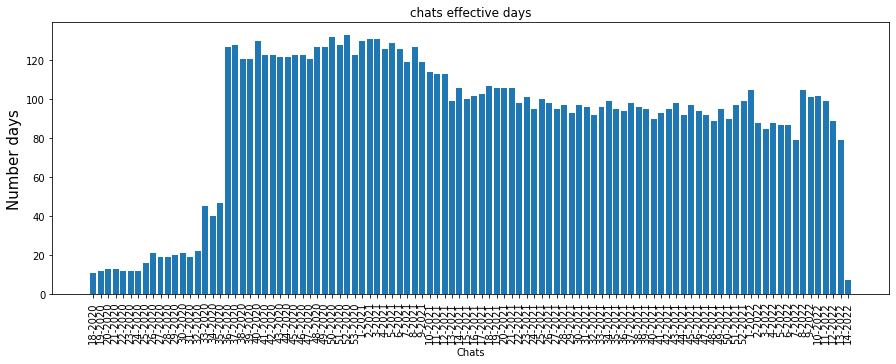

In [111]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import rcParams

x = active_chats_count.period
y = active_chats_count.counts   
rcParams['figure.figsize'] = 15, 5
plt.xlabel('Chats', fontsize=10)
plt.ylabel('Number days', fontsize=15)
plt.title('chats effective days')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


for tick in plt.gca().get_xticklabels():      
    tick.set_rotation(90)

#plt.savefig('Number-of-posts-per-day-local-chats.pdf')


pl= plt.bar(x = x, height = y)

plt.show()